In [32]:
import sys
import pickle
sys.path.append('.')

from testing_normal_functions import spectral_emb, clt_sample, plot_spherical_data,\
                                    mvn_assump_samples_wrapper, samples_under_assump,\
                                    print_pickle_data
import numpy as np
from scipy.stats import beta, uniform, wasserstein_distance
import matplotlib.pyplot as plt
from copy import deepcopy


np.random.seed(45)

μ_1 = np.array([0.25,0.75])
μ_2 = np.array([0.75, 0.25])

N_t=1000

<h2> Test with Beta(2,2) prior </h2>

In [ ]:
dist_name = 'beta(2,2)'

In [7]:
α, β = 2, 2
prior = lambda : beta.rvs(α, β)
exp_rho = α / (α + β)
second_mom_rho = beta.moment(2, α, β)

Text(0.5, 1.0, 'beta(2, 2) distribution')

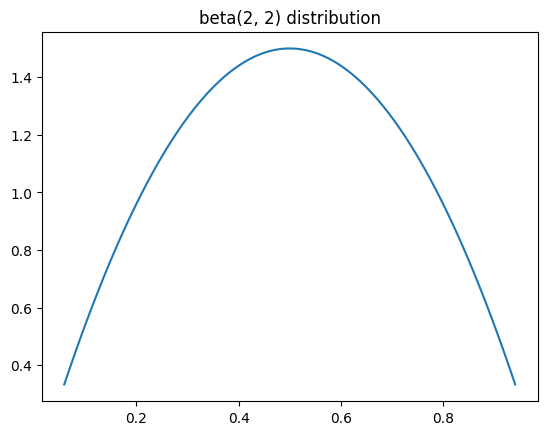

In [10]:
x = np.linspace(beta.ppf(0.01, α, β),
                beta.ppf(0.99, α, β), 100)
plt.plot(x, beta.pdf(x, α, β))
plt.title(f"{dist_name} distribution")

<h3> Spectral Embedding </h3>

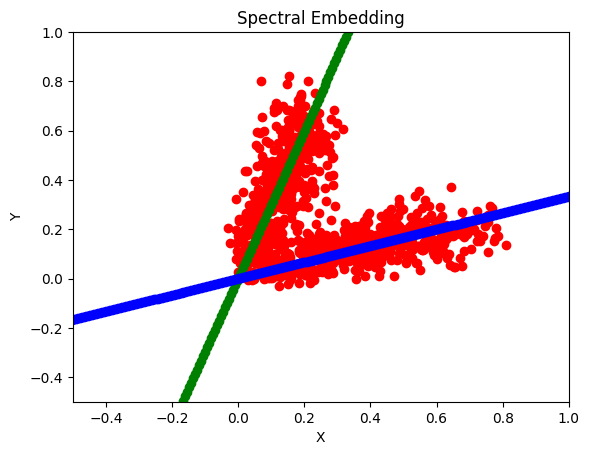

In [43]:
spectral_embedding = spectral_emb(μ_1, μ_2, prior, N_t=1000)

plot_spherical_data(zip([spectral_embedding[:,0]], [spectral_embedding[:,1]]),
                  μ_1, μ_2, "Spectral Embedding")


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 122985.69it/s]


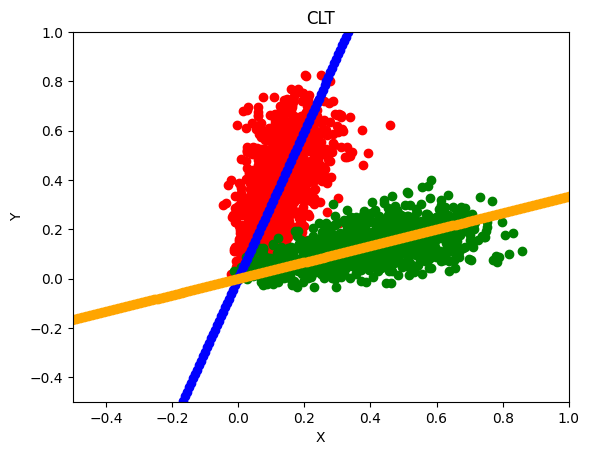

In [44]:
samples_from_clt = clt_sample(prior, μ_1, μ_2, exp_rho)

clt_zip_samples = [
                (samples_from_clt[:N_t,0], samples_from_clt[:N_t,1]),
               (samples_from_clt[N_t:,0], samples_from_clt[N_t:,1])
               ]


plot_spherical_data(clt_zip_samples, μ_1, μ_2, "CLT")


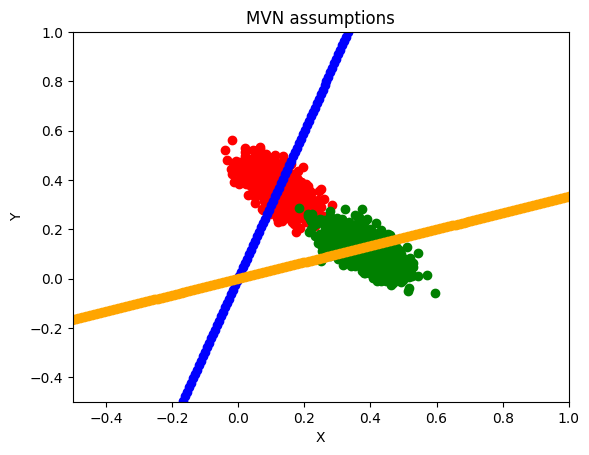

In [45]:
mvn1_x, mvn1_y, mvn2_x, mvn2_y = mvn_assump_samples_wrapper(μ_1, μ_2, prior, exp_rho, second_mom_rho)

mvn_zip_samples = [
                (mvn1_x, mvn1_y),
               (mvn2_x, mvn2_y)
               ]


plot_spherical_data(mvn_zip_samples, μ_1, μ_2, "MVN assumptions")

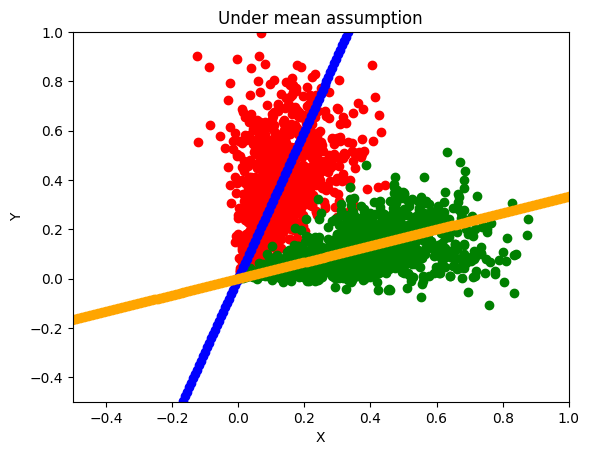

In [46]:
under_assump = samples_under_assump(μ_1, μ_2, prior, exp_rho)

zipped_under_assump = [
    (under_assump[:N_t,0], under_assump[:N_t,1]),
    (under_assump[N_t:,0], under_assump[N_t:,1])
]

plot_spherical_data(zipped_under_assump, μ_1, μ_2, "Under mean assumption")

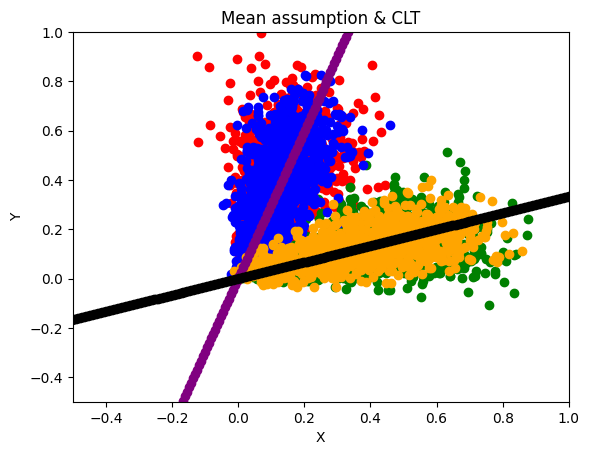

In [47]:
zua = deepcopy(zipped_under_assump)
zua.extend(clt_zip_samples)

plot_spherical_data(zua, μ_1, μ_2, "Mean assumption & CLT")

<h4> Calculate spherical transformation </h4>

In [48]:
sph_trans_clt_group_1 = np.arctan2(samples_from_clt[:N_t,1], samples_from_clt[:N_t,0])
sph_trans_clt_group_2 = np.arctan2(samples_from_clt[N_t:,1], samples_from_clt[N_t:,0])

sph_trans_mvn_group_1 = np.arctan2(mvn1_y, mvn1_x)
sph_trans_mvn_group_2 = np.arctan2(mvn2_y, mvn2_x)

wass_dist_group_1 = wasserstein_distance(sph_trans_clt_group_1, sph_trans_mvn_group_1)
wass_dist_group_2 = wasserstein_distance(sph_trans_clt_group_2, sph_trans_mvn_group_2)

print(wass_dist_group_1, wass_dist_group_2)

0.018649802294682286 0.024014603100942812


<h3> Store Data in Pickle File </h3>

In [49]:
# Store data in pickle file
with open('beta_2_2_approximations.pkl', 'wb') as file:  # 'wb' for write binary
    pickle.dump(spectral_embedding, file)
    pickle.dump(samples_from_clt, file)
    pickle.dump((mvn1_x, mvn1_y, mvn2_x, mvn2_y), file)
    pickle.dump(under_assump, file)
    pickle.dump(wass_dist_group_1, file)
    pickle.dump(wass_dist_group_2, file)

In [2]:
print_pickle_data('beta_2_2_approximations.pkl')


            spectral_embedding: [[0.23566794 0.22211748]
 [0.10513234 0.21412925]
 [0.05355523 0.54157805]
 ...
 [0.22136584 0.1424241 ]
 [0.47820995 0.18356331]
 [0.60189991 0.07959054]]

            samples_from_clt: [[-0.01049651  0.2881259 ]
 [ 0.03944704  0.15143951]
 [ 0.27761163  0.63484445]
 ...
 [ 0.59537384  0.12632064]
 [ 0.17028341  0.07259313]
 [ 0.21643582  0.06415551]]

            (mvn1_x, mvn1_y, mvn2_x, mvn2_y): ([0.09593737941877215, 0.1575433110915628, 0.16210972421521463, 0.12370500346208065, 0.14025308785325935, 0.048185182700868925, 0.17875376323635533, 0.18750337950108498, 0.18302130202266237, 0.1065302558793434, 0.10845231062247246, 0.08628008542689687, 0.070858223629593, 0.17381024880347995, 0.17515588397297255, 0.13005571839574476, 0.15352059315688454, 0.11614183753870053, 0.1715383348943377, 0.15909846417218493, 0.09004691994866659, 0.041505813514027934, 0.18159596558523858, 0.14531003236845488, 0.03758589452109376, 0.20893030144656383, 0.16169832812756524,

(array([[0.23566794, 0.22211748],
        [0.10513234, 0.21412925],
        [0.05355523, 0.54157805],
        ...,
        [0.22136584, 0.1424241 ],
        [0.47820995, 0.18356331],
        [0.60189991, 0.07959054]]),
 array([[-0.01049651,  0.2881259 ],
        [ 0.03944704,  0.15143951],
        [ 0.27761163,  0.63484445],
        ...,
        [ 0.59537384,  0.12632064],
        [ 0.17028341,  0.07259313],
        [ 0.21643582,  0.06415551]]),
 ([0.09593737941877215,
   0.1575433110915628,
   0.16210972421521463,
   0.12370500346208065,
   0.14025308785325935,
   0.048185182700868925,
   0.17875376323635533,
   0.18750337950108498,
   0.18302130202266237,
   0.1065302558793434,
   0.10845231062247246,
   0.08628008542689687,
   0.070858223629593,
   0.17381024880347995,
   0.17515588397297255,
   0.13005571839574476,
   0.15352059315688454,
   0.11614183753870053,
   0.1715383348943377,
   0.15909846417218493,
   0.09004691994866659,
   0.041505813514027934,
   0.18159596558523858,
 

<h2> Beta(4,2) Distribution</h2>

This beta distribution is skewed more towards (0,1) - where the assumptions are more accurate

In [ ]:
dist_name = 'beta_4_2'

In [11]:
α, β = 4, 2
prior = lambda : beta.rvs(α, β)
exp_rho = α / (α + β)
second_mom_rho = beta.moment(2, α, β)

Text(0.5, 1.0, 'beta(4, 2) distribution')

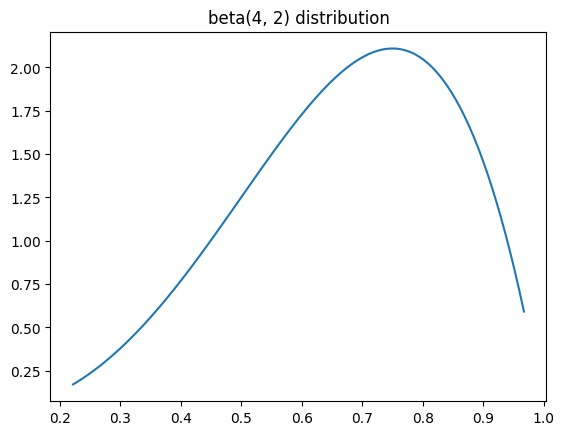

In [12]:
x = np.linspace(beta.ppf(0.01, α, β),
                beta.ppf(0.99, α, β), 100)
plt.plot(x, beta.pdf(x, α, β))
plt.title(f"{dist_name} distribution")

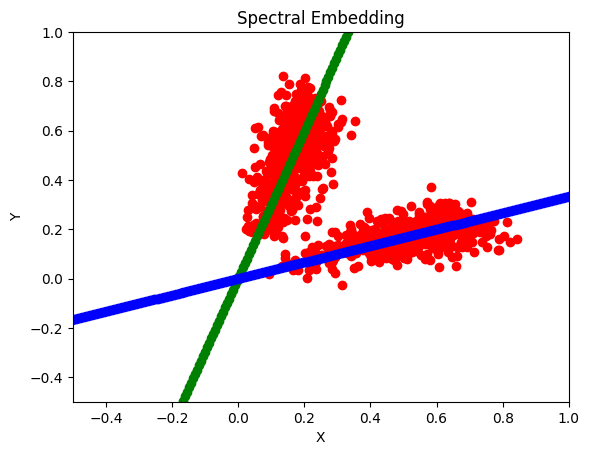

In [51]:
spectral_embedding = spectral_emb(μ_1, μ_2, prior, N_t=1000)

plot_spherical_data(zip([spectral_embedding[:,0]], [spectral_embedding[:,1]]),
                  μ_1, μ_2, "Spectral Embedding")

100%|██████████| 1000/1000 [00:00<00:00, 134338.09it/s]


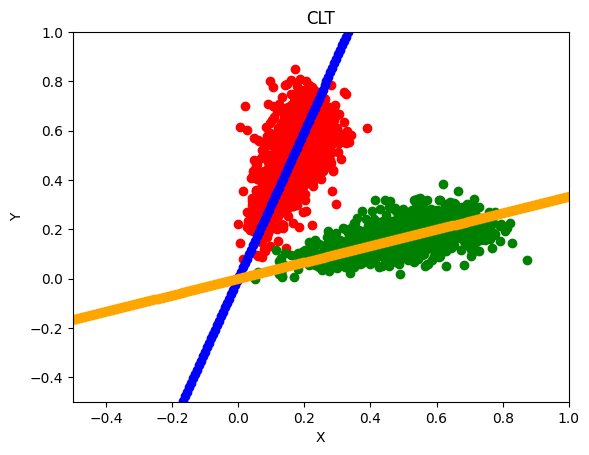

In [52]:
samples_from_clt = clt_sample(prior, μ_1, μ_2, exp_rho)

clt_zip_samples = [
                (samples_from_clt[:N_t,0], samples_from_clt[:N_t,1]),
               (samples_from_clt[N_t:,0], samples_from_clt[N_t:,1])
               ]


plot_spherical_data(clt_zip_samples, μ_1, μ_2, "CLT")

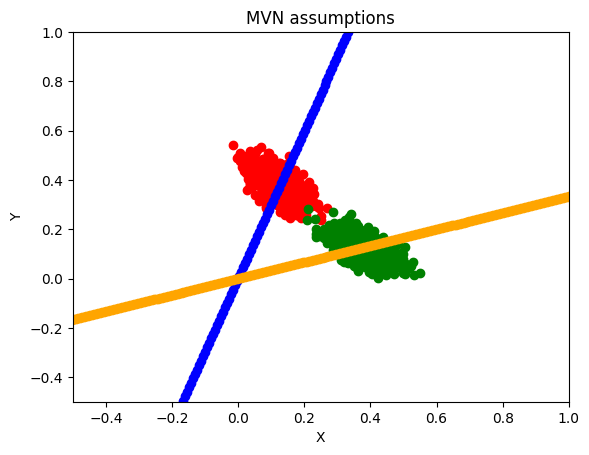

In [53]:
mvn1_x, mvn1_y, mvn2_x, mvn2_y = mvn_assump_samples_wrapper(μ_1, μ_2, prior, exp_rho, second_mom_rho)

mvn_zip_samples = [
                (mvn1_x, mvn1_y),
               (mvn2_x, mvn2_y)
               ]


plot_spherical_data(mvn_zip_samples, μ_1, μ_2, "MVN assumptions")

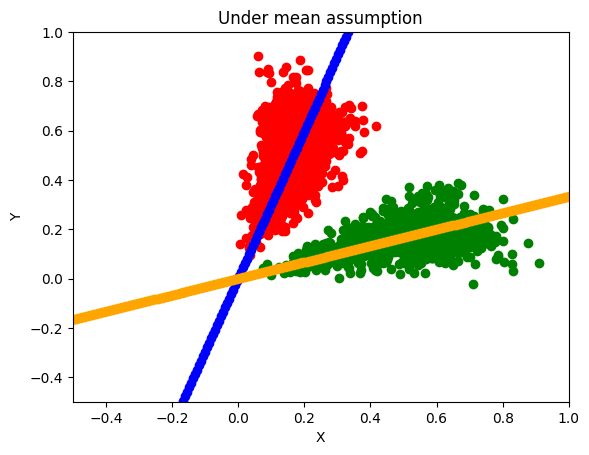

In [54]:
under_assump = samples_under_assump(μ_1, μ_2, prior, exp_rho)

zipped_under_assump = [
    (under_assump[:N_t,0], under_assump[:N_t,1]),
    (under_assump[N_t:,0], under_assump[N_t:,1])
]

plot_spherical_data(zipped_under_assump, μ_1, μ_2, "Under mean assumption")

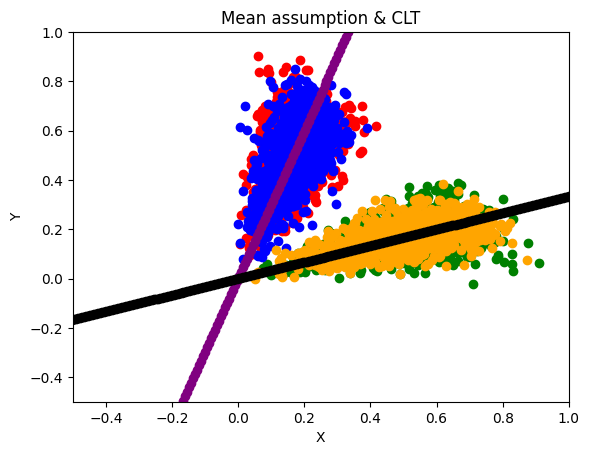

In [55]:
zua = deepcopy(zipped_under_assump)
zua.extend(clt_zip_samples)

plot_spherical_data(zua, μ_1, μ_2, "Mean assumption & CLT")

<h4> Spherical Transformation </h4>

In [56]:
sph_trans_clt_group_1 = np.arctan2(samples_from_clt[:N_t,1], samples_from_clt[:N_t,0])
sph_trans_clt_group_2 = np.arctan2(samples_from_clt[N_t:,1], samples_from_clt[N_t:,0])

sph_trans_mvn_group_1 = np.arctan2(mvn1_y, mvn1_x)
sph_trans_mvn_group_2 = np.arctan2(mvn2_y, mvn2_x)

wass_dist_group_1 = wasserstein_distance(sph_trans_clt_group_1, sph_trans_mvn_group_1)
wass_dist_group_2 = wasserstein_distance(sph_trans_clt_group_2, sph_trans_mvn_group_2)

print(wass_dist_group_1, wass_dist_group_2)

0.021818157850424853 0.024105216628180236


In [57]:
with open(f"{dist_name}_approximations.pkl", 'wb') as file:  # 'wb' for write binary
    pickle.dump(spectral_embedding, file)
    pickle.dump(samples_from_clt, file)
    pickle.dump((mvn1_x, mvn1_y, mvn2_x, mvn2_y), file)
    pickle.dump(under_assump, file)
    pickle.dump(wass_dist_group_1, file)
    pickle.dump(wass_dist_group_2, file)

In [3]:
print_pickle_data('beta_4_2_approximations.pkl')


            spectral_embedding: [[0.118167   0.50435388]
 [0.14915494 0.6085293 ]
 [0.64664519 0.24210174]
 ...
 [0.51253296 0.15306809]
 [0.34145834 0.10243155]
 [0.63634811 0.30768797]]

            samples_from_clt: [[0.13037155 0.42706066]
 [0.13770077 0.3392906 ]
 [0.22656867 0.46154156]
 ...
 [0.29674271 0.10924004]
 [0.38620631 0.13210595]
 [0.51376705 0.07420654]]

            (mvn1_x, mvn1_y, mvn2_x, mvn2_y): ([0.07506514027260443, 0.09766968321477851, 0.06622186397571006, 0.0823334991519751, 0.0690420924271183, 0.16507373684797505, 0.12941964723912835, 0.18718448105392133, 0.1365762739905062, 0.14640373320341116, 0.12691031693554072, 0.2286863350495732, 0.17431013110752552, 0.1265730693860834, 0.12754305656777878, 0.07644939913107088, 0.0779737056432897, 0.14626876842359168, 0.07862520415657294, 0.039226105098772, 0.12723513083003724, 0.1560103043112071, 0.08806217023652911, 0.15507939919326238, 0.15376587299016603, 0.14654107659241733, 0.11110302083974921, 0.105272319242182

(array([[0.118167  , 0.50435388],
        [0.14915494, 0.6085293 ],
        [0.64664519, 0.24210174],
        ...,
        [0.51253296, 0.15306809],
        [0.34145834, 0.10243155],
        [0.63634811, 0.30768797]]),
 array([[0.13037155, 0.42706066],
        [0.13770077, 0.3392906 ],
        [0.22656867, 0.46154156],
        ...,
        [0.29674271, 0.10924004],
        [0.38620631, 0.13210595],
        [0.51376705, 0.07420654]]),
 ([0.07506514027260443,
   0.09766968321477851,
   0.06622186397571006,
   0.0823334991519751,
   0.0690420924271183,
   0.16507373684797505,
   0.12941964723912835,
   0.18718448105392133,
   0.1365762739905062,
   0.14640373320341116,
   0.12691031693554072,
   0.2286863350495732,
   0.17431013110752552,
   0.1265730693860834,
   0.12754305656777878,
   0.07644939913107088,
   0.0779737056432897,
   0.14626876842359168,
   0.07862520415657294,
   0.039226105098772,
   0.12723513083003724,
   0.1560103043112071,
   0.08806217023652911,
   0.15507939919326

<h1> Beta(2,7) </h1>

In [22]:
dist_name = 'beta_2_7'

In [23]:
α, β = 2, 7
prior = lambda : beta.rvs(α, β)
exp_rho = α / (α + β)
second_mom_rho = beta.moment(2, α, β)

Text(0.5, 1.0, 'beta_2_7 distribution')

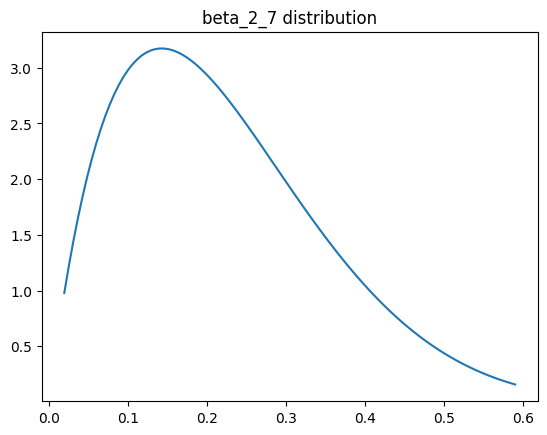

In [24]:
x = np.linspace(beta.ppf(0.01, α, β),
                beta.ppf(0.99, α, β), 100)
plt.plot(x, beta.pdf(x, α, β))
plt.title(f"{dist_name} distribution")

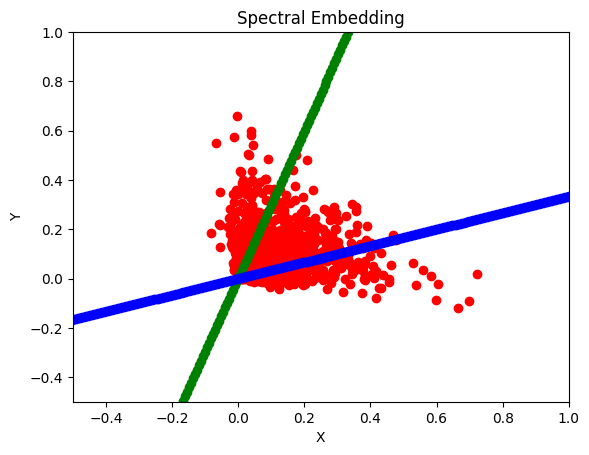

In [25]:
spectral_embedding = spectral_emb(μ_1, μ_2, prior, N_t=1000)

plot_spherical_data(zip([spectral_embedding[:,0]], [spectral_embedding[:,1]]),
                  μ_1, μ_2, "Spectral Embedding")

100%|██████████| 1000/1000 [00:00<00:00, 130274.07it/s]


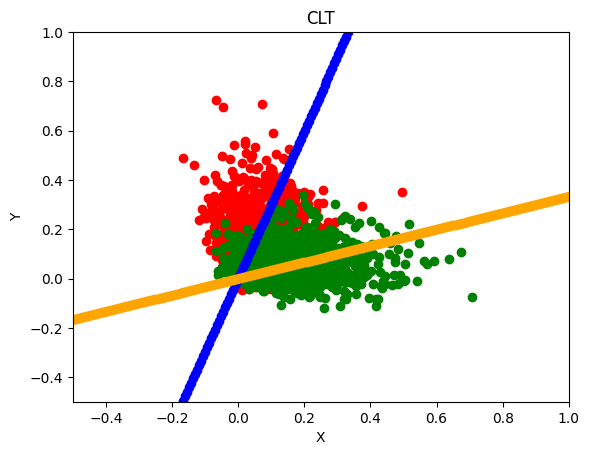

In [26]:
samples_from_clt = clt_sample(prior, μ_1, μ_2, exp_rho)

clt_zip_samples = [
                (samples_from_clt[:N_t,0], samples_from_clt[:N_t,1]),
               (samples_from_clt[N_t:,0], samples_from_clt[N_t:,1])
               ]


plot_spherical_data(clt_zip_samples, μ_1, μ_2, "CLT")

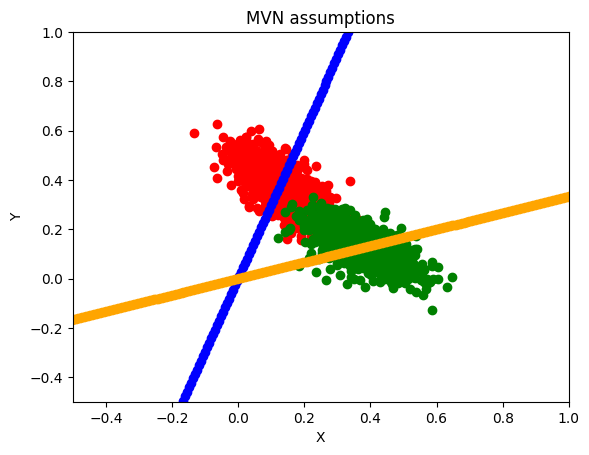

In [27]:
mvn1_x, mvn1_y, mvn2_x, mvn2_y = mvn_assump_samples_wrapper(μ_1, μ_2, prior, exp_rho, second_mom_rho)

mvn_zip_samples = [
                (mvn1_x, mvn1_y),
               (mvn2_x, mvn2_y)
               ]


plot_spherical_data(mvn_zip_samples, μ_1, μ_2, "MVN assumptions")

100%|██████████| 1000/1000 [00:00<00:00, 122115.59it/s]


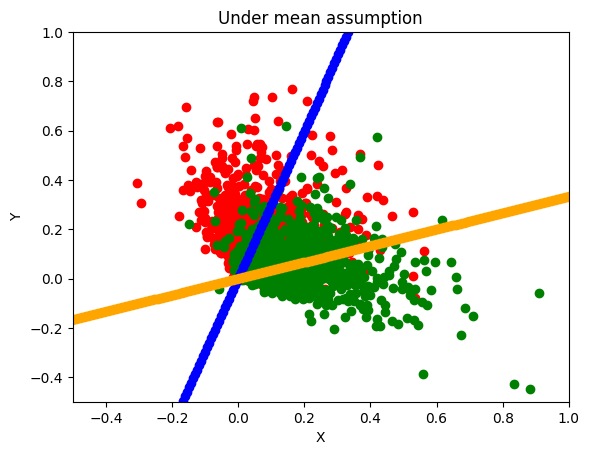

In [28]:
under_assump = samples_under_assump(μ_1, μ_2, prior, exp_rho)

zipped_under_assump = [
    (under_assump[:N_t,0], under_assump[:N_t,1]),
    (under_assump[N_t:,0], under_assump[N_t:,1])
]

plot_spherical_data(zipped_under_assump, μ_1, μ_2, "Under mean assumption")

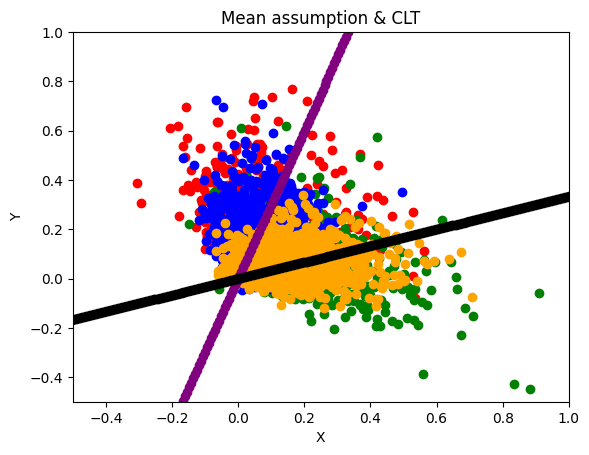

In [29]:
zua = deepcopy(zipped_under_assump)
zua.extend(clt_zip_samples)

plot_spherical_data(zua, μ_1, μ_2, "Mean assumption & CLT")

In [30]:
sph_trans_clt_group_1 = np.arctan2(samples_from_clt[:N_t,1], samples_from_clt[:N_t,0])
sph_trans_clt_group_2 = np.arctan2(samples_from_clt[N_t:,1], samples_from_clt[N_t:,0])

sph_trans_mvn_group_1 = np.arctan2(mvn1_y, mvn1_x)
sph_trans_mvn_group_2 = np.arctan2(mvn2_y, mvn2_x)

wass_dist_group_1 = wasserstein_distance(sph_trans_clt_group_1, sph_trans_mvn_group_1)
wass_dist_group_2 = wasserstein_distance(sph_trans_clt_group_2, sph_trans_mvn_group_2)

print(wass_dist_group_1, wass_dist_group_2)

0.24116946495623828 0.27803814829730267


In [31]:
with open(f"{dist_name}_approximations.pkl", 'wb') as file:  # 'wb' for write binary
    pickle.dump(spectral_embedding, file)
    pickle.dump(samples_from_clt, file)
    pickle.dump((mvn1_x, mvn1_y, mvn2_x, mvn2_y), file)
    pickle.dump(under_assump, file)
    pickle.dump(wass_dist_group_1, file)
    pickle.dump(wass_dist_group_2, file)

In [37]:
print_pickle_data('beta_2_7_approximations.pkl')


            spectral_embedding: [[ 0.13492768  0.02817164]
 [ 0.06457579  0.06836954]
 [-0.05342311  0.34911617]
 ...
 [ 0.14275965  0.07266246]
 [ 0.18916137  0.15174338]
 [ 0.00547557  0.03796342]]

            samples_from_clt: [[0.19223546 0.05837312]
 [0.00210024 0.13884392]
 [0.07742009 0.2036766 ]
 ...
 [0.07994857 0.04156267]
 [0.25032252 0.10559175]
 [0.08144957 0.09227346]]

            (mvn1_x, mvn1_y, mvn2_x, mvn2_y): ([0.0972501330816283, 0.06729938993097213, 0.0926546339571519, 0.11267936919412719, -0.04671676812575562, 0.08131932447649207, 0.031058589794683567, 0.10009254678449743, 0.13392503899924663, 0.06200550906751093, 0.16992119293919977, 0.06037670668407481, 0.06460561818129293, 0.19644728931232547, 0.15638458165549876, 0.14600985035058472, 0.2015132646558811, 0.11442480161744568, 0.1440319242544315, 0.118416998692413, 0.10775170353630317, 0.05715495537807558, 0.07014426579276331, 0.16838515285805833, 0.14633958253235718, 0.09424654958055989, 0.035951531969372966,

(array([[ 0.13492768,  0.02817164],
        [ 0.06457579,  0.06836954],
        [-0.05342311,  0.34911617],
        ...,
        [ 0.14275965,  0.07266246],
        [ 0.18916137,  0.15174338],
        [ 0.00547557,  0.03796342]]),
 array([[0.19223546, 0.05837312],
        [0.00210024, 0.13884392],
        [0.07742009, 0.2036766 ],
        ...,
        [0.07994857, 0.04156267],
        [0.25032252, 0.10559175],
        [0.08144957, 0.09227346]]),
 ([0.0972501330816283,
   0.06729938993097213,
   0.0926546339571519,
   0.11267936919412719,
   -0.04671676812575562,
   0.08131932447649207,
   0.031058589794683567,
   0.10009254678449743,
   0.13392503899924663,
   0.06200550906751093,
   0.16992119293919977,
   0.06037670668407481,
   0.06460561818129293,
   0.19644728931232547,
   0.15638458165549876,
   0.14600985035058472,
   0.2015132646558811,
   0.11442480161744568,
   0.1440319242544315,
   0.118416998692413,
   0.10775170353630317,
   0.05715495537807558,
   0.07014426579276331,
  

In [57]:
dist_name = 'beta_7_2'

In [58]:
α, β = 7, 2
prior = lambda : beta.rvs(α, β)
exp_rho = α / (α + β)
second_mom_rho = beta.moment(2, α, β)

Text(0.5, 1.0, 'beta_7_2 distribution')

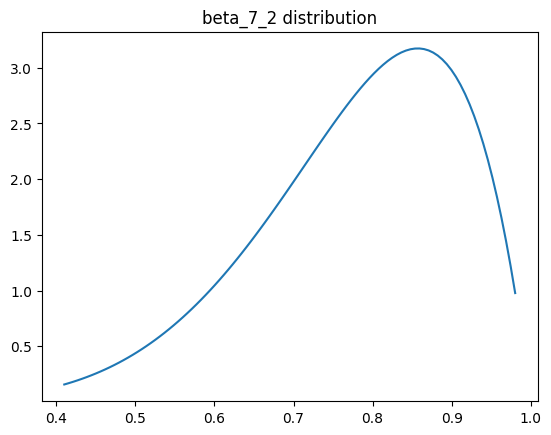

In [59]:
x = np.linspace(beta.ppf(0.01, α, β),
                beta.ppf(0.99, α, β), 100)
plt.plot(x, beta.pdf(x, α, β))
plt.title(f"{dist_name} distribution")

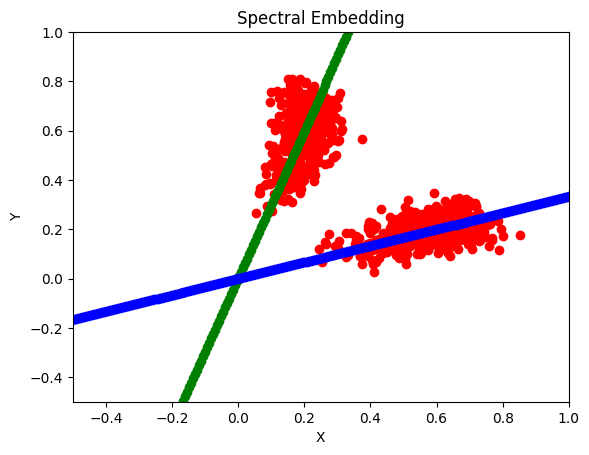

In [60]:
spectral_embedding = spectral_emb(μ_1, μ_2, prior, N_t=1000)

plot_spherical_data(zip([spectral_embedding[:,0]], [spectral_embedding[:,1]]),
                  μ_1, μ_2, "Spectral Embedding")

100%|██████████| 1000/1000 [00:00<00:00, 99610.61it/s]


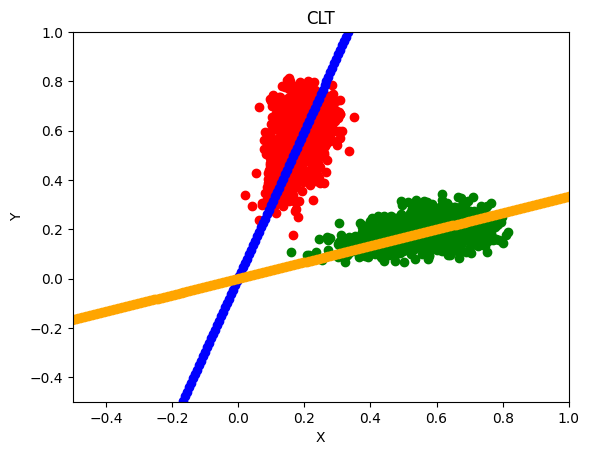

In [61]:
samples_from_clt = clt_sample(prior, μ_1, μ_2, exp_rho)

clt_zip_samples = [
                (samples_from_clt[:N_t,0], samples_from_clt[:N_t,1]),
               (samples_from_clt[N_t:,0], samples_from_clt[N_t:,1])
               ]


plot_spherical_data(clt_zip_samples, μ_1, μ_2, "CLT")

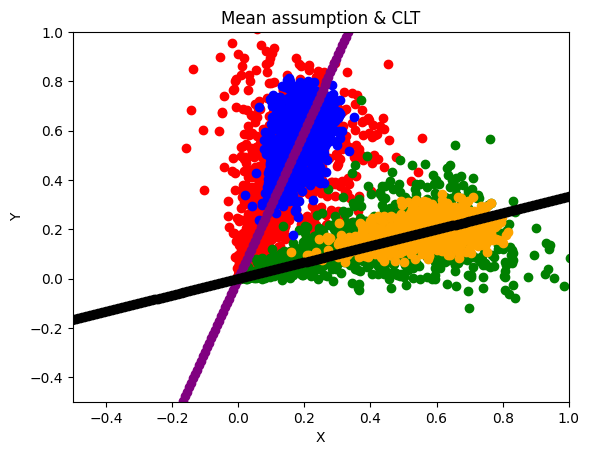

In [62]:
zua = deepcopy(zipped_under_assump)
zua.extend(clt_zip_samples)

plot_spherical_data(zua, μ_1, μ_2, "Mean assumption & CLT")

In [63]:
sph_trans_clt_group_1 = np.arctan2(samples_from_clt[:N_t,1], samples_from_clt[:N_t,0])
sph_trans_clt_group_2 = np.arctan2(samples_from_clt[N_t:,1], samples_from_clt[N_t:,0])

sph_trans_mvn_group_1 = np.arctan2(mvn1_y, mvn1_x)
sph_trans_mvn_group_2 = np.arctan2(mvn2_y, mvn2_x)

wass_dist_group_1 = wasserstein_distance(sph_trans_clt_group_1, sph_trans_mvn_group_1)
wass_dist_group_2 = wasserstein_distance(sph_trans_clt_group_2, sph_trans_mvn_group_2)

print(wass_dist_group_1, wass_dist_group_2)

0.08284440988804428 0.076845300539875


In [64]:
with open(f"{dist_name}_approximations.pkl", 'wb') as file:  # 'wb' for write binary
    pickle.dump(spectral_embedding, file)
    pickle.dump(samples_from_clt, file)
    pickle.dump((mvn1_x, mvn1_y, mvn2_x, mvn2_y), file)
    pickle.dump(under_assump, file)
    pickle.dump(wass_dist_group_1, file)
    pickle.dump(wass_dist_group_2, file)

In [65]:
print_pickle_data(f"{dist_name}_approximations.pkl")


            spectral_embedding: [[0.15515022 0.63244053]
 [0.61735087 0.22780632]
 [0.44949419 0.10647788]
 ...
 [0.14917484 0.55601588]
 [0.14063819 0.42106062]
 [0.1532151  0.58592069]]

            samples_from_clt: [[0.17091754 0.6013647 ]
 [0.23139392 0.70764471]
 [0.20162146 0.50128062]
 ...
 [0.54260706 0.21868867]
 [0.63205781 0.18723233]
 [0.58740484 0.23636088]]

            (mvn1_x, mvn1_y, mvn2_x, mvn2_y): ([0.16318295530627774, 0.15668011091654716, 0.0627350419688104, 0.19000546500642945, 0.13499546454365963, 0.12321680018216714, 0.11588028170808214, 0.18512186683940743, 0.07156141986178942, 0.10633878650687645, 0.09505437980497111, 0.07329655115981704, 0.22998907067681632, 0.1738787356057183, 0.019180443803438585, 0.1602265828628294, 0.20640515483589789, 0.11100828433075184, 0.09630975563364705, 0.161752646213913, 0.060913031344739244, 0.17235490236219628, 0.21074193174732267, 0.1844899134888353, 0.14056046062695216, 0.07169344237739753, 0.10812857130371047, 0.2004787615

(array([[0.15515022, 0.63244053],
        [0.61735087, 0.22780632],
        [0.44949419, 0.10647788],
        ...,
        [0.14917484, 0.55601588],
        [0.14063819, 0.42106062],
        [0.1532151 , 0.58592069]]),
 array([[0.17091754, 0.6013647 ],
        [0.23139392, 0.70764471],
        [0.20162146, 0.50128062],
        ...,
        [0.54260706, 0.21868867],
        [0.63205781, 0.18723233],
        [0.58740484, 0.23636088]]),
 ([0.16318295530627774,
   0.15668011091654716,
   0.0627350419688104,
   0.19000546500642945,
   0.13499546454365963,
   0.12321680018216714,
   0.11588028170808214,
   0.18512186683940743,
   0.07156141986178942,
   0.10633878650687645,
   0.09505437980497111,
   0.07329655115981704,
   0.22998907067681632,
   0.1738787356057183,
   0.019180443803438585,
   0.1602265828628294,
   0.20640515483589789,
   0.11100828433075184,
   0.09630975563364705,
   0.161752646213913,
   0.060913031344739244,
   0.17235490236219628,
   0.21074193174732267,
   0.18448991

<h1> Uniform </h1>

In [46]:
dist_name = 'uniform'

In [47]:
prior = lambda : uniform.rvs()
exp_rho = 0.5
second_mom_rho = uniform.moment(2)

Text(0.5, 1.0, 'uniform distribution')

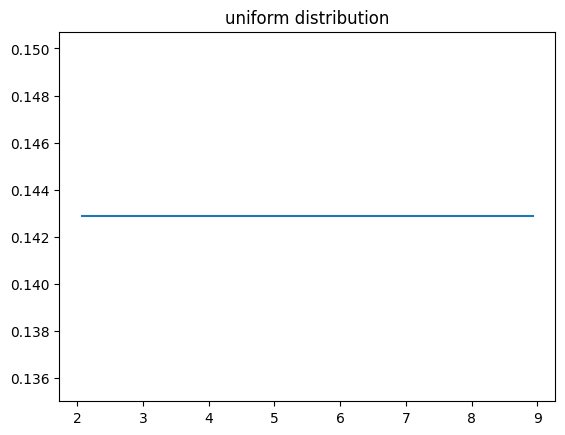

In [48]:
x = np.linspace(uniform.ppf(0.01, α, β),
                uniform.ppf(0.99, α, β), 100)
plt.plot(x, uniform.pdf(x, α, β))
plt.title(f"{dist_name} distribution")

In [49]:
uniform.moment(2)

0.3333333333333333

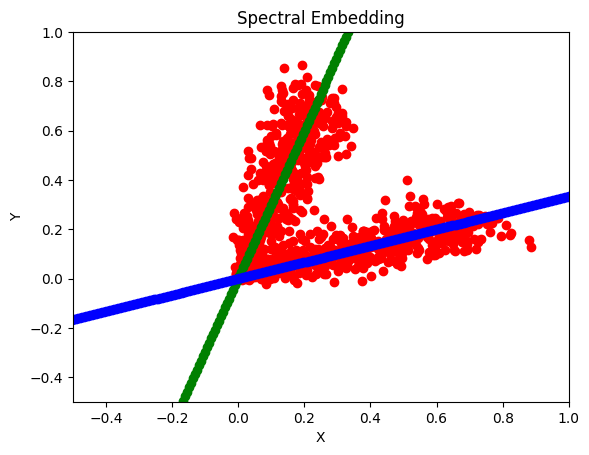

In [50]:
spectral_embedding = spectral_emb(μ_1, μ_2, prior, N_t=1000)

plot_spherical_data(zip([spectral_embedding[:,0]], [spectral_embedding[:,1]]),
                  μ_1, μ_2, "Spectral Embedding")

100%|██████████| 1000/1000 [00:00<00:00, 184235.44it/s]


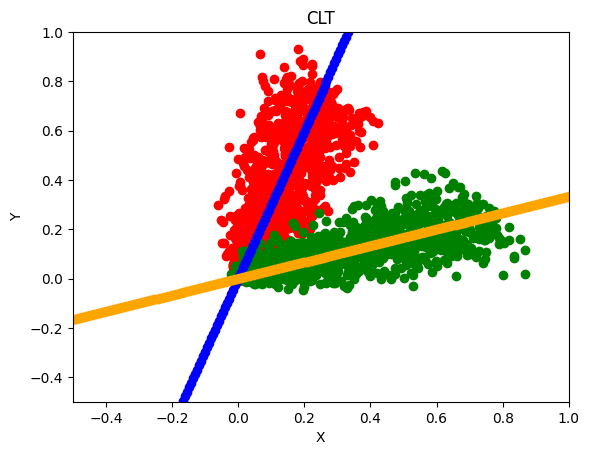

In [51]:
samples_from_clt = clt_sample(prior, μ_1, μ_2, exp_rho)

clt_zip_samples = [
                (samples_from_clt[:N_t,0], samples_from_clt[:N_t,1]),
               (samples_from_clt[N_t:,0], samples_from_clt[N_t:,1])
               ]


plot_spherical_data(clt_zip_samples, μ_1, μ_2, "CLT")

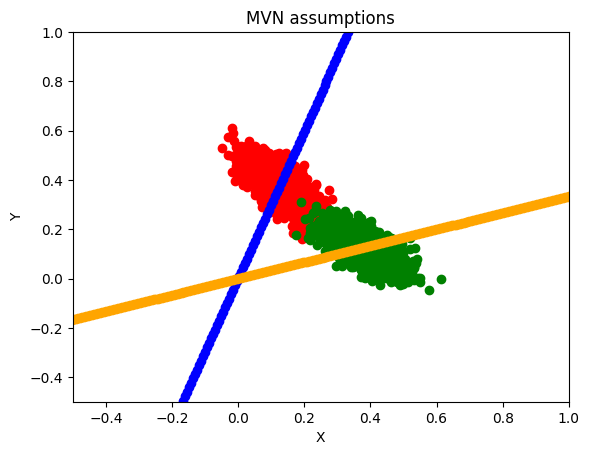

In [52]:
mvn1_x, mvn1_y, mvn2_x, mvn2_y = mvn_assump_samples_wrapper(μ_1, μ_2, prior, exp_rho, second_mom_rho)

mvn_zip_samples = [
                (mvn1_x, mvn1_y),
               (mvn2_x, mvn2_y)
               ]


plot_spherical_data(mvn_zip_samples, μ_1, μ_2, "MVN assumptions")

100%|██████████| 1000/1000 [00:00<00:00, 193428.52it/s]


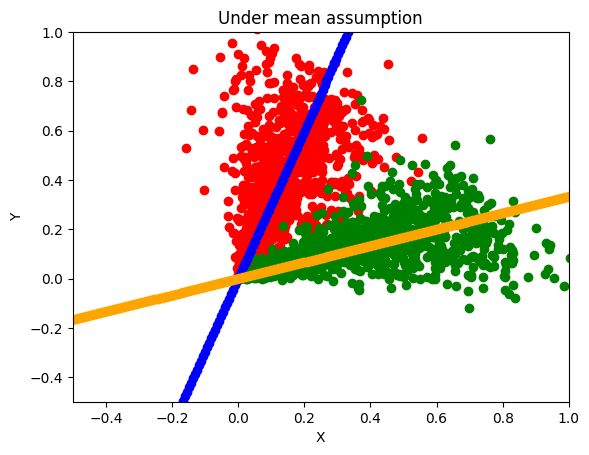

In [53]:
under_assump = samples_under_assump(μ_1, μ_2, prior, exp_rho)

zipped_under_assump = [
    (under_assump[:N_t,0], under_assump[:N_t,1]),
    (under_assump[N_t:,0], under_assump[N_t:,1])
]

plot_spherical_data(zipped_under_assump, μ_1, μ_2, "Under mean assumption")

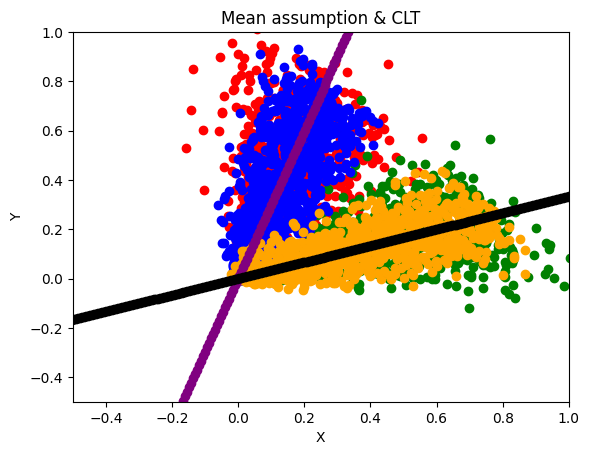

In [54]:
zua = deepcopy(zipped_under_assump)
zua.extend(clt_zip_samples)

plot_spherical_data(zua, μ_1, μ_2, "Mean assumption & CLT")

In [55]:
sph_trans_clt_group_1 = np.arctan2(samples_from_clt[:N_t,1], samples_from_clt[:N_t,0])
sph_trans_clt_group_2 = np.arctan2(samples_from_clt[N_t:,1], samples_from_clt[N_t:,0])

sph_trans_mvn_group_1 = np.arctan2(mvn1_y, mvn1_x)
sph_trans_mvn_group_2 = np.arctan2(mvn2_y, mvn2_x)

wass_dist_group_1 = wasserstein_distance(sph_trans_clt_group_1, sph_trans_mvn_group_1)
wass_dist_group_2 = wasserstein_distance(sph_trans_clt_group_2, sph_trans_mvn_group_2)

print(wass_dist_group_1, wass_dist_group_2)

0.04967564633130542 0.0549026623138808


In [56]:
with open(f"{dist_name}_approximations.pkl", 'wb') as file:  # 'wb' for write binary
    pickle.dump(spectral_embedding, file)
    pickle.dump(samples_from_clt, file)
    pickle.dump((mvn1_x, mvn1_y, mvn2_x, mvn2_y), file)
    pickle.dump(under_assump, file)
    pickle.dump(wass_dist_group_1, file)
    pickle.dump(wass_dist_group_2, file)